## Calculating Power
By Simon Van Norden and Nicolas Harvie

***
This example shows how to 
- use a parametric simulation to study the power of the KS test, based on the example that we discussed in Lecture.
- use the ``kstest()`` function in ``scipy.stats`` to calculate the Kolmogorov-Smirnov (KS) test statistic and its p-value. 
- use the ``norm()`` function in ``scipy.stats`` to calculate the normal cdf.

**Write a function that** 
- accepts 2 parameters (*N,N_chi*) 
- draws *N - N_chi* i.i.d. random values from a N(0,1) distribution
- draws another *N_chi* i.i.d. random values from a $\chi^2(1)$ distribution
- uses these *N* draws to perform a KS test of the $H_0$ that they are distributed $N(0,1)$.
- returns the KS statistic and its exact 1-tailed p-value

In [1]:
# import image module
from IPython.display import Image

In [2]:
Image(url="../slide_images/KS_1.png", width=700, height=500)

In [3]:
Image(url="../slide_images/KS_2.png", width=700, height=500)

In [4]:
from numpy.random import normal
from scipy.stats import kstest
from scipy.stats import norm

def func_Q1a(N, N_chi):
    # Possibility of seeding the generator
    x = normal(size = N)        # Draw N values
    x[0:N_chi] = x[0:N_chi]**2  # Square the first N_chi values
    return kstest(x, norm.cdf, mode = 'exact')

[Normal Distribution vs Khi2](https://www.gaussianwaves.com/2012/09/chi-squared-distribution/)

**Write another function that**
- accepts parameters (*N,N_chi,N_reps*)
- calls your function from (a) with *N* and *N_chi*
- repeats this *N_reps* times
- returns the fraction of times that KS test rejects $H_0$ at the 5% level.

In [5]:
Image(url="../slide_images/POWER.png", width=1000, height=500)

In [6]:
def func_Q1b(N, N_chi, N_reps):
    N_rej = 0           # Set the counter to 0
    for j in range(N_reps):
        ks_stat, ks_pval = func_Q1a(N, N_chi)
        if ks_pval < 0.05:  # p-value < 5%, so we increment the counter
            N_rej += 1
    return N_rej / N_reps

print(f'The power of the KS test is {func_Q1b(200,3,1000)}.')

The power of the KS test is 0.056.


**c)** Using your code from (b), *N_reps=500* and *N=200*, make a graph showing how the power of the test increases from 5% to 50% as we increase *N_chi*.

Text(0.5, 0, 'Number of non-normal draws')

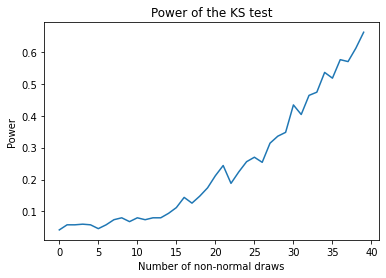

In [7]:
import matplotlib.pyplot as plt
import numpy as np

n = 40  # range of values to try
KS_power = np.empty(n)
# Why not seed the generator?
np.random.seed(19590721)
for j in range(n):
    KS_power[j] = func_Q1b(200, j, 500)

plt.plot(KS_power)
plt.title('Power of the KS test')
plt.ylabel('Power')
plt.xlabel('Number of non-normal draws')